# Ward

This notebook illustrates the hierarchical clustering of graphs by the [Ward method](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html), based on the spectral embedding of the graph.

In [1]:
import numpy as np
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = np.array(['r', 'b', 'g', 'c', 'm', 'y'])

## Undirected graphs

**Loading**

In [3]:
graph = skn.data.karate_club(metadata=True)
adjacency = graph.adjacency
labels_true = graph.labels
pos = graph.pos

**Clustering**

In [4]:
ward = skn.hierarchy.Ward()

In [5]:
dendrogram = ward.fit_transform(adjacency)

**Visualization**

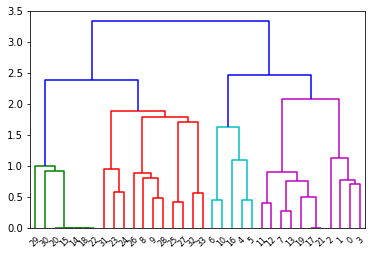

In [6]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [7]:
# default = 2 clusters
labels = skn.hierarchy.cut_straight(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
# cut with 4 clusters
labels = skn.hierarchy.cut_straight(dendrogram, n_clusters = 4)
print(labels)

[1 1 1 1 3 3 3 1 0 0 3 1 1 1 2 2 3 1 2 1 2 1 2 0 0 0 0 0 0 2 2 0 0 0]


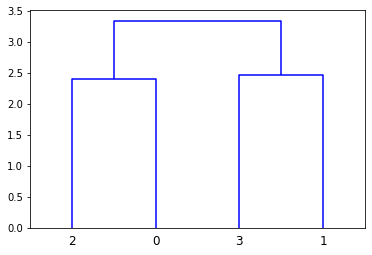

In [9]:
labels, dendrogram_new = skn.hierarchy.cut_straight(dendrogram, n_clusters = 4, return_dendrogram=True)
_ = show_dendrogram(dendrogram_new)

**Visualization**

In [10]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


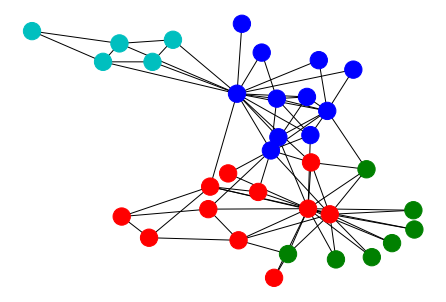

In [11]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels])

**Metrics**

In [12]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.583710407239819

In [13]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4342993247923885

**Parameters**

In [14]:
ward = skn.hierarchy.Ward(embedding_method=skn.embedding.Spectral(n_components=5))
ward.fit(adjacency)

Ward(embedding_method=Spectral(n_components=5, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=LanczosEig(which='LA')))

## Directed graphs

**Loading**

In [15]:
graph = skn.data.painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
pos = graph.pos

**Clustering**

In [16]:
# treat directed graph as bipartite graph
biward = skn.hierarchy.BiWard()

In [17]:
dendrogram = biward.fit_transform(adjacency)

**Visualization**

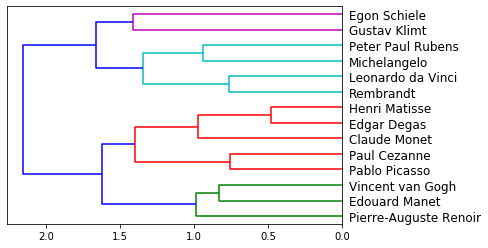

In [18]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram, labels = names, orientation = 'left')

**Cuts of the dendrogram**

In [19]:
# cut with 3 clusters
labels = skn.hierarchy.cut_straight(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


In [20]:
labels_unique, counts = np.unique(labels, return_counts = True)
print(labels_unique, counts)

[0 1 2] [8 4 2]


**Visualization**

In [21]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [ ]:
names_dict = {i:name for i, name in enumerate(names)}

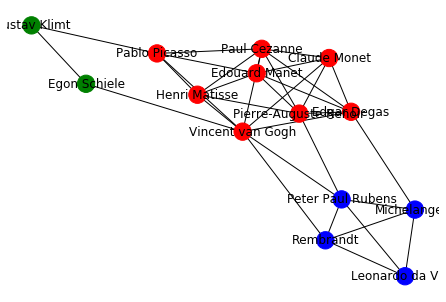

In [22]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=COLORS[labels], labels = names_dict)

**Metrics**

In [23]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.49857142857142855

In [24]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.48729193280825467

## Bipartite graphs

**Loading**

In [25]:
graph = skn.data.movie_actor(metadata=True)
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [26]:
biward = skn.hierarchy.BiWard(cluster_col = True, cluster_both = True)
biward.fit(biadjacency)

BiWard(embedding_method=GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=LanczosSVD()), cluster_row=True, cluster_col=True, cluster_both=True)

In [27]:
dendrogram = biward.dendrogram_full_
dendrogram_movies = biward.dendrogram_row_
dendrogram_actors = biward.dendrogram_col_

**Visualization**

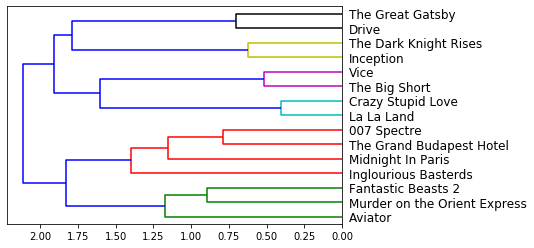

In [28]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram_movies, labels = movies, orientation = 'left')

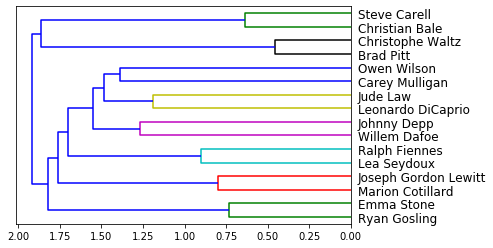

In [29]:
_ = show_dendrogram(dendrogram_actors, labels = actors, orientation = 'left')

**Cuts of the dendrogram**

In [30]:
labels = skn.hierarchy.cut_straight(dendrogram, n_clusters = 4)
n1, n2 = biadjacency.shape
labels_row = labels[:n1]
labels_col = labels[n1:]

In [31]:
labels_unique, counts_row = np.unique(labels_row, return_counts = True)
_, counts_col = np.unique(labels_col, return_counts=True)
print(labels_unique, counts_row, counts_col)

[0 1 2 3] [5 5 3 2] [5 5 4 2]


**Visualization**

In [32]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [33]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [34]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [35]:
names_dict = {i: movie for i, movie in enumerate(movies)}
names_dict.update({n1 + i: actor for i, actor in enumerate(movies)})

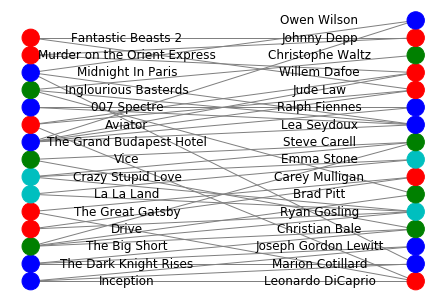

In [36]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels % len(COLORS)], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names_dict)